## Name: Sunil Pradhan

## DOMAIN-RETAIL

## OBJECTIVE-
•It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.

•Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits

•Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).


## Project Task: Week 1(Data cleaning and Data transformation)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("Online Retail1.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Check for missing data and formulate an apt strategy to treat them

In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
round(df.isna().sum()/len(df)*100,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

### Since, Description column is irrelevent to the model building.So, i deleted the entire column.

In [7]:
df.drop("Description",axis=1,inplace=True)
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df.shape

(541909, 7)

In [9]:
df[df["CustomerID"].isna()]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...
541536,581498,85099B,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


#### CustomerID is important feature of our analysis,since our analysis is centered around Customers only so we can not impute null values with mean/ median/ mode in this case. We will check possibility to fill null values in CustomerID column by looking up for InvoiceNo of the row having null CustomerID. If there are still any null values in CustomerID after this process then we will drop complete row having missing CustomerID.

In [10]:
null_customerID=set(df[df["CustomerID"].isna()]["InvoiceNo"])
null_customerID

{540673,
 540674,
 540675,
 540676,
 540677,
 540678,
 540679,
 'A563186',
 540681,
 540683,
 540684,
 540685,
 540693,
 540694,
 540695,
 540696,
 548886,
 'C539756',
 540699,
 548887,
 548888,
 548889,
 548890,
 548893,
 548894,
 548895,
 548897,
 565275,
 548901,
 565286,
 565288,
 573482,
 573487,
 565296,
 565297,
 573488,
 573489,
 557108,
 573490,
 565302,
 565303,
 557112,
 565304,
 565306,
 565307,
 565308,
 573493,
 565310,
 573494,
 573495,
 573497,
 565314,
 573498,
 573499,
 573503,
 573505,
 565319,
 548945,
 557137,
 557138,
 557139,
 557140,
 557151,
 565346,
 573540,
 540778,
 573547,
 548977,
 573553,
 'C572456',
 548980,
 565368,
 565369,
 548986,
 565370,
 565371,
 548989,
 565376,
 548994,
 565378,
 548996,
 548997,
 548998,
 548999,
 549000,
 549001,
 549002,
 549003,
 549004,
 549005,
 549006,
 565385,
 549008,
 549009,
 549010,
 549011,
 565389,
 540821,
 565396,
 573585,
 565400,
 573589,
 573590,
 573591,
 540828,
 573592,
 573593,
 549023,
 540832,
 540833,
 

In [11]:
df[df["InvoiceNo"].isin(null_customerID) & (~df['CustomerID'].isnull())]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### We could not find any value to impute null values in CustomerID column,since all entries for a particular InvoiceNo have missing CustomerID if that particular InvoiceNo has null CustomerID in even one entry. So we will drop all rows having null values in CustomerID.

In [12]:
df.dropna(inplace=True)
df.isna().sum()
print("\n")
print("The shape of dataset is",df.shape)



The shape of dataset is (406829, 7)


## Remove duplicate data records

Since our data is transactional data and it has duplicate entries for InvoiceNo and CustomerID, we will drop only those rows which are completely duplicated.

In [13]:
df.shape

(406829, 7)

In [14]:
df.drop_duplicates()
df.shape

(406829, 7)

## Perform descriptive analytics on the given data

In [15]:
df["CustomerID"]=df["CustomerID"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Quantity     406829 non-null  int64         
 3   InvoiceDate  406829 non-null  datetime64[ns]
 4   UnitPrice    406829 non-null  float64       
 5   CustomerID   406829 non-null  object        
 6   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 24.8+ MB


In [16]:
df.describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [17]:
df.describe(datetime_is_numeric=True)

,Quantity,InvoiceDate,UnitPrice
count,406829.000000,406829,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471
min,-80995.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000
50%,5.000000,2011-07-31 11:48:00,1.950000
75%,12.000000,2011-10-20 13:06:00,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,248.693370,NaN,69.315162


1.Quantity: Average quantity of each product in transaction is 12.06. Also note that minimum value in Quantity column is negative. This implies that some customers had returned the product during our period of analysis.

2.InvoiceDate: Our data has transaction between 01-12-2010 to 09-12-2011

3.UnitPrice: Average price of each product in transactions is 3.46

In [18]:
df.describe(include="object")

,InvoiceNo,StockCode,CustomerID,Country
count,406829,406829,406829,406829
unique,22190,3684,4372,37
top,576339,85123A,17841.0,United Kingdom
freq,542,2077,7983,361878


1.InvoiceNo: Total entries in preprocessed data are 4,06,829 but transactions are 22,190. Most number of entries (count of unique products) are in Invoice No. '576339' and is 542 nos.

2.StockCode: There are total 3684 unique products in our data and product with stock code '85123A' appears most frequently (2077 times) in our data.

3.CustomerID: There are 4372 unique customers in our final preprocessed data. Customer with ID '17841' appears most frequently in data (7983 times)

4.Country: Company has customers across 37 countries. Most entries are from United Kingdom in our dataset (361878)

### Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts. 

#### Create month cohorts and analyze active customers for each cohort.

In [19]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [20]:
df["Year_month"]=df["InvoiceDate"].dt.to_period("M")
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year_month
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


In [21]:
df.groupby("Year_month")["CustomerID"].unique()

Year_month
2010-12    [17850.0, 13047.0, 12583.0, 13748.0, 15100.0, ...
2011-01    [13313.0, 18097.0, 16656.0, 16875.0, 13094.0, ...
2011-02    [15240.0, 14911.0, 14496.0, 17147.0, 17675.0, ...
2011-03    [14620.0, 14740.0, 13880.0, 16462.0, 17068.0, ...
2011-04    [18161.0, 14886.0, 17613.0, 12523.0, 13694.0, ...
2011-05    [15606.0, 14800.0, 16931.0, 15708.0, 14304.0, ...
2011-06    [15643.0, 14842.0, 15124.0, 14646.0, 12423.0, ...
2011-07    [16317.0, 13492.0, 14911.0, 17865.0, 17667.0, ...
2011-08    [17941.0, 14947.0, 12921.0, 14060.0, 14239.0, ...
2011-09    [13509.0, 13305.0, 16187.0, 17306.0, 12474.0, ...
2011-10    [16353.0, 16591.0, 16923.0, 15038.0, 17811.0, ...
2011-11    [17733.0, 17419.0, 13461.0, 13697.0, 14911.0, ...
2011-12    [13853.0, 15197.0, 13644.0, 13310.0, 13468.0, ...
Freq: M, Name: CustomerID, dtype: object

In [22]:
Month_cohort=df.groupby("Year_month")["CustomerID"].nunique()
Month_cohort

Year_month
2010-12     948
2011-01     783
2011-02     798
2011-03    1020
2011-04     899
2011-05    1079
2011-06    1051
2011-07     993
2011-08     980
2011-09    1302
2011-10    1425
2011-11    1711
2011-12     686
Freq: M, Name: CustomerID, dtype: int64

Text(0.5, 1.0, 'No. of active customers')

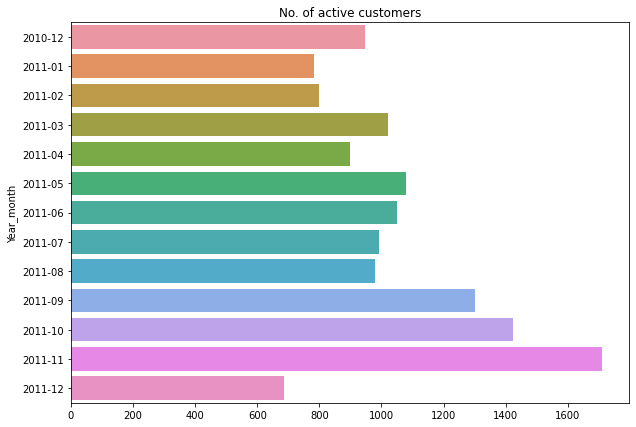

In [23]:
plt.figure(figsize=(10,7))
sns.barplot(x=Month_cohort.values,y=Month_cohort.index)
plt.title("No. of active customers")

#### Analyze the retention rate of customers

In [24]:
Month_cohort

Year_month
2010-12     948
2011-01     783
2011-02     798
2011-03    1020
2011-04     899
2011-05    1079
2011-06    1051
2011-07     993
2011-08     980
2011-09    1302
2011-10    1425
2011-11    1711
2011-12     686
Freq: M, Name: CustomerID, dtype: int64

In [25]:
Month_cohort.shift

<bound method Series.shift of Year_month
2010-12     948
2011-01     783
2011-02     798
2011-03    1020
2011-04     899
2011-05    1079
2011-06    1051
2011-07     993
2011-08     980
2011-09    1302
2011-10    1425
2011-11    1711
2011-12     686
Freq: M, Name: CustomerID, dtype: int64>

In [26]:
Month_cohort.shift(1)

Year_month
2010-12       NaN
2011-01     948.0
2011-02     783.0
2011-03     798.0
2011-04    1020.0
2011-05     899.0
2011-06    1079.0
2011-07    1051.0
2011-08     993.0
2011-09     980.0
2011-10    1302.0
2011-11    1425.0
2011-12    1711.0
Freq: M, Name: CustomerID, dtype: float64

In [27]:
Month_cohort-Month_cohort.shift(1)

Year_month
2010-12       NaN
2011-01    -165.0
2011-02      15.0
2011-03     222.0
2011-04    -121.0
2011-05     180.0
2011-06     -28.0
2011-07     -58.0
2011-08     -13.0
2011-09     322.0
2011-10     123.0
2011-11     286.0
2011-12   -1025.0
Freq: M, Name: CustomerID, dtype: float64

In [28]:
retention_rate = round(Month_cohort.pct_change(periods=1)*100,2)
retention_rate

Year_month
2010-12      NaN
2011-01   -17.41
2011-02     1.92
2011-03    27.82
2011-04   -11.86
2011-05    20.02
2011-06    -2.59
2011-07    -5.52
2011-08    -1.31
2011-09    32.86
2011-10     9.45
2011-11    20.07
2011-12   -59.91
Freq: M, Name: CustomerID, dtype: float64

Text(0.5, 1.0, 'Retention rate of customer')

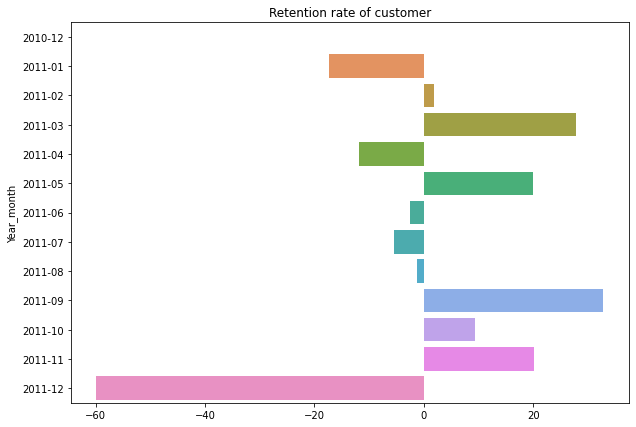

In [29]:
plt.figure(figsize=(10,7))
sns.barplot(x=retention_rate.values,y=retention_rate.index)
plt.title("Retention rate of customer")

## Data modeling

### Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

### Recency model

In [30]:
df["InvoiceDate"]

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [31]:
# We will fix reference date for calculating recency as last transaction day in data + 1 day
from  datetime import timedelta
reference_day=max(df["InvoiceDate"]) + timedelta(days=1)
reference_day

Timestamp('2011-12-10 12:50:00')

In [32]:
df["days_to_last_order"]=(reference_day - df["InvoiceDate"]).dt.days
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year_month,days_to_last_order
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,374
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,374
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,374
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,374
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,374


In [33]:
df_recency=df.groupby("CustomerID")["days_to_last_order"].min().reset_index()
df_recency

,CustomerID,days_to_last_order
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310
...,...,...
4367,18280.0,278
4368,18281.0,181
4369,18282.0,8
4370,18283.0,4


## Frequency model

In [34]:
df.groupby("CustomerID").nunique()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,Year_month,days_to_last_order
CustomerID,,,,,,,,
12346.0,2,1,2,2,1,1,1,1
12347.0,7,103,15,7,32,1,7,7
12348.0,4,22,10,4,7,1,4,4
12349.0,1,73,12,1,32,1,1,1
12350.0,1,17,5,1,7,1,1,1
...,...,...,...,...,...,...,...,...
18280.0,1,10,5,1,7,1,1,1
18281.0,1,7,4,1,4,1,1,1
18282.0,3,12,9,3,9,1,2,3


In [35]:
df_frequency=df.groupby("CustomerID").nunique()["InvoiceNo"].reset_index()
df_frequency

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


## Monetary model

In [36]:
df["Amount"]=df["Quantity"]*df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year_month,days_to_last_order,Amount
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,374,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,374,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,374,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,374,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,374,20.34


In [37]:
df_monetary=df.groupby("CustomerID").sum()["Amount"].reset_index()
df_monetary

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


## RMF metrics

In [38]:
df_recency

,CustomerID,days_to_last_order
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310
...,...,...
4367,18280.0,278
4368,18281.0,181
4369,18282.0,8
4370,18283.0,4


In [39]:
df_frequency

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


In [40]:
df_monetary

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [41]:
rf_model=pd.merge(df_recency,df_frequency,on="CustomerID",how="inner")
rfm_model=pd.merge(rf_model,df_monetary,on="CustomerID",how="inner")
rfm_model.columns=["CustomerID","Recency","Frequency","Monetary"]
rfm_model

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4367,18280.0,278,1,180.60
4368,18281.0,181,1,80.82
4369,18282.0,8,3,176.60
4370,18283.0,4,16,2094.88


## Build RFM Segments.Give recency,frequency and monetary scores individually by dividing them into quartiles.Combine three ratings to get a RFM segment (as strings)

Note: 

1.Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.

2.Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money.


Newest    2734
Newer      588
Medium     416
Older      353
Oldest     281
Name: Recency_label, dtype: int64

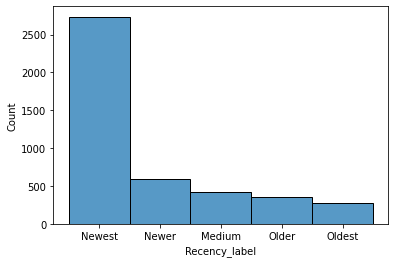

In [42]:
rfm_model["Recency_label"]=pd.cut(rfm_model["Recency"],bins=5,labels=["Newest","Newer","Medium","Older","Oldest"])
sns.histplot(rfm_model["Recency_label"])
rfm_model["Recency_label"].value_counts()

Highest    4348
Higher       18
Medium        3
Lowest        2
Lower         1
Name: Frequency_label, dtype: int64

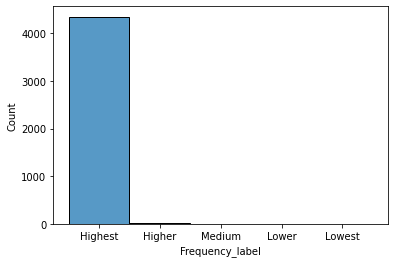

In [43]:
rfm_model["Frequency_label"]=pd.cut(rfm_model["Frequency"],bins=5,labels=["Highest","Higher","Medium","Lower","Lowest"])
sns.histplot(rfm_model["Frequency_label"])
rfm_model["Frequency_label"].value_counts()

Largest     2734
Larger       588
Medium       416
Smaller      353
Smallest     281
Name: Monetary_label, dtype: int64

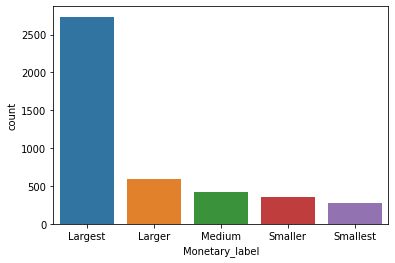

In [44]:
rfm_model["Monetary_label"]=pd.cut(rfm_model["Recency"],bins=5,labels=["Largest","Larger","Medium","Smaller","Smallest"])
sns.countplot(rfm_model["Monetary_label"])
rfm_model["Monetary_label"].value_counts()

In [45]:
rfm_model["RFM_label"]=rfm_model[["Recency_label","Frequency_label","Monetary_label"]].agg("-".join,axis=1)
rfm_model.head()

,CustomerID,Recency,Frequency,Monetary,Recency_label,Frequency_label,Monetary_label,RFM_label
0,12346.0,326,2,0.00,Oldest,Highest,Smallest,Oldest-Highest-Smallest
1,12347.0,2,7,4310.00,Newest,Highest,Largest,Newest-Highest-Largest
2,12348.0,75,4,1797.24,Newest,Highest,Largest,Newest-Highest-Largest
3,12349.0,19,1,1757.55,Newest,Highest,Largest,Newest-Highest-Largest
4,12350.0,310,1,334.40,Oldest,Highest,Smallest,Oldest-Highest-Smallest


## Get the RFM score by adding up the three ratings

In [46]:
recency_dict={"Newest":5,"Newer":4,"Medium":3,"Older":2,"Oldest":1}
frequency_dict={"Lowest":1,"Lower":2,"Medium":3,"Higher":4,"Highest":5}
monetary_dict={"Smallest":1,"Smaller":2,"Medium":3,"Larger":4,"Largest":5}
rfm_model["RFM_score"]=rfm_model["Recency_label"].map(recency_dict).astype(int) + rfm_model["Frequency_label"].map(frequency_dict).astype(int) + rfm_model["Monetary_label"].map(monetary_dict).astype(int)
rfm_model.head()

,CustomerID,Recency,Frequency,Monetary,Recency_label,Frequency_label,Monetary_label,RFM_label,RFM_score
0,12346.0,326,2,0.00,Oldest,Highest,Smallest,Oldest-Highest-Smallest,7
1,12347.0,2,7,4310.00,Newest,Highest,Largest,Newest-Highest-Largest,15
2,12348.0,75,4,1797.24,Newest,Highest,Largest,Newest-Highest-Largest,15
3,12349.0,19,1,1757.55,Newest,Highest,Largest,Newest-Highest-Largest,15
4,12350.0,310,1,334.40,Oldest,Highest,Smallest,Oldest-Highest-Smallest,7


## Analyze the RFM segments by summarizing them and comment on the findings

<AxesSubplot:>

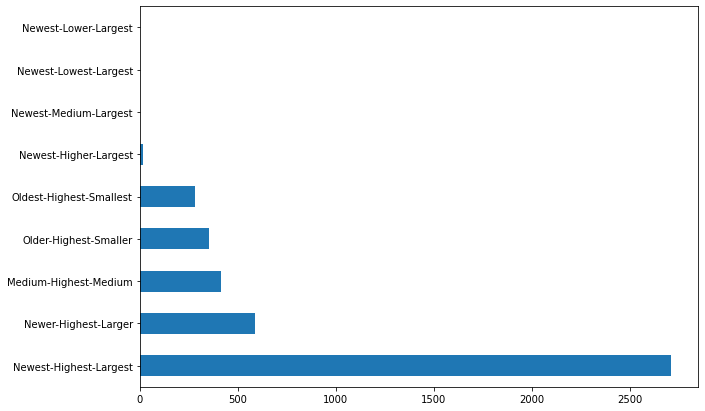

In [47]:
plt.figure(figsize=(10,7))
rfm_model["RFM_label"].value_counts().plot(kind="barh")

<AxesSubplot:xlabel='RFM_score', ylabel='count'>

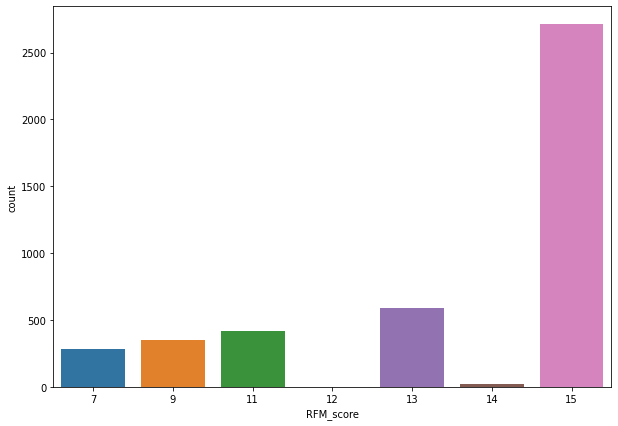

In [48]:
plt.figure(figsize=(10,7))
sns.countplot(rfm_model["RFM_score"])

## Project Task: Week 2(Create clusters using k-means clustering algorithm)

### 1.Prepare the data for the algorithm.If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

In [49]:
rfm_model.head()

,CustomerID,Recency,Frequency,Monetary,Recency_label,Frequency_label,Monetary_label,RFM_label,RFM_score
0,12346.0,326,2,0.00,Oldest,Highest,Smallest,Oldest-Highest-Smallest,7
1,12347.0,2,7,4310.00,Newest,Highest,Largest,Newest-Highest-Largest,15
2,12348.0,75,4,1797.24,Newest,Highest,Largest,Newest-Highest-Largest,15
3,12349.0,19,1,1757.55,Newest,Highest,Largest,Newest-Highest-Largest,15
4,12350.0,310,1,334.40,Oldest,Highest,Smallest,Oldest-Highest-Smallest,7


<AxesSubplot:xlabel='Recency'>

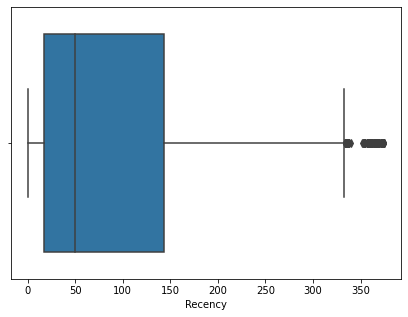

In [50]:
plt.figure(figsize=(7,5))
sns.boxplot(rfm_model["Recency"])

<AxesSubplot:xlabel='Frequency'>

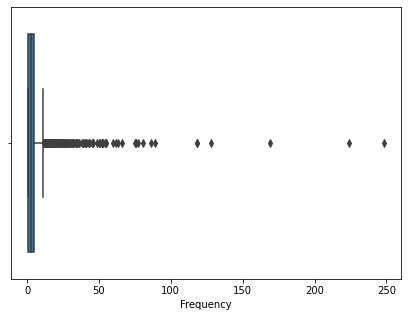

In [51]:
plt.figure(figsize=(7,5))
sns.boxplot(rfm_model["Frequency"])

<AxesSubplot:xlabel='Monetary'>

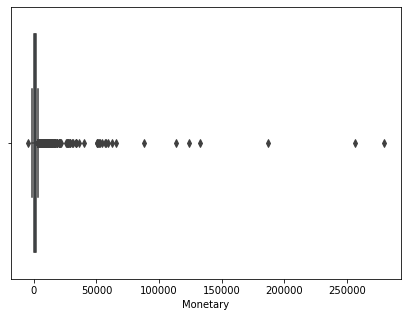

In [52]:
plt.figure(figsize=(7,5))
sns.boxplot(rfm_model["Monetary"])

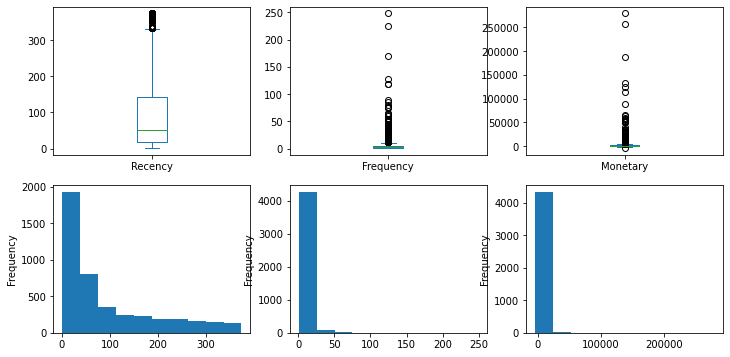

In [53]:
plt.figure(figsize=(12,6))

for i, feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(2,3,i+1)
    rfm_model[feature].plot(kind='box')
    plt.subplot(2,3,i+1+3)
    rfm_model[feature].plot(kind='hist')

### Outliers: Frequency and Monetary features in above data seem to have lot of outliers. Lets drop them.

In [54]:
rfm_model=rfm_model[(rfm_model["Frequency"]<60) & (rfm_model["Monetary"]<40000)]
rfm_model.shape

(4346, 9)

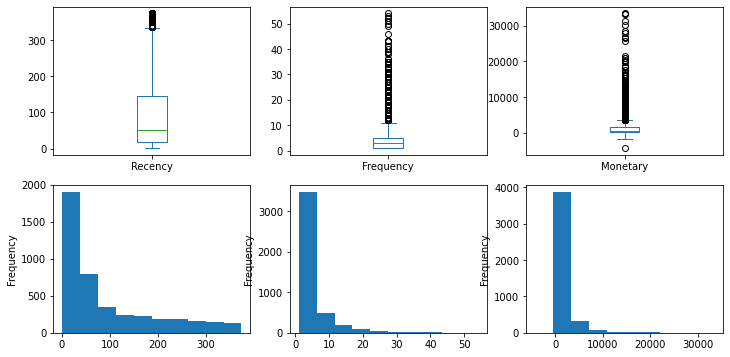

In [55]:
plt.figure(figsize=(12,6))

for i, feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(2,3,i+1)
    rfm_model[feature].plot(kind='box')
    plt.subplot(2,3,i+1+3)
    rfm_model[feature].plot(kind='hist')

### Log Transformation: Now since all three features have right skewed data therefore we will use log transformation of these features in our model.

In [56]:
rfm_model_log=pd.DataFrame()
rfm_model_log["Recency"]=np.log(rfm_model["Recency"])
rfm_model_log["Frequency"]=np.log(rfm_model["Frequency"])
rfm_model_log["Monetary"]=np.log(rfm_model["Monetary"]-rfm_model["Monetary"].min()+1)
rfm_model_log.head()

,Recency,Frequency,Monetary
0,5.786897,0.693147,8.363723
1,0.693147,1.945910,9.059358
2,4.317488,1.386294,8.713725
3,2.944439,0.000000,8.707182
4,5.736572,0.000000,8.438806


#### Standard Scalar Transformation: It is extremely important to rescale the features so that they have a comparable scale.

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
rfm_model_scaled=scaler.fit_transform(rfm_model_log[["Recency","Frequency","Monetary"]])

rfm_model_scaled=pd.DataFrame(rfm_model_scaled)
rfm_model_scaled.columns=["Recency","Frequency","Monetary"]
rfm_model_scaled.head()

,Recency,Frequency,Monetary
0,1.402988,-0.388507,-0.772738
1,-2.100874,0.967301,1.481096
2,0.392218,0.361655,0.361257
3,-0.552268,-1.138669,0.340058
4,1.368370,-1.138669,-0.529472


## Decide the optimum number of clusters to be formed

In [58]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_model_scaled)

KMeans(max_iter=50, n_clusters=3)

In [59]:
kmeans.labels_

array([1, 2, 0, ..., 0, 2, 0])

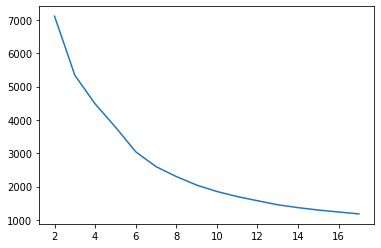

In [60]:
#Finding the Optimal Number of Clusters with the help of Elbow Curve/ SSD.
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,13,14,15,16,17]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(rfm_model_scaled)
    
    ssd.append(kmeans.inertia_)
plt.plot(range_n_clusters,ssd)

In [61]:
#Creating dataframe for exporting to create visualization in tableau later
df_inertia=pd.DataFrame(list(zip(range_n_clusters, ssd)),columns=['clusters', 'intertia'])
df_inertia

,clusters,intertia
0,2,7109.487111
1,3,5340.527958
2,4,4478.752264
3,5,3786.319617
4,6,3043.888575
5,7,2598.312427
6,8,2300.954046
7,9,2045.352385
8,10,1852.890952
9,11,1700.738793


In [62]:
# Finding the Optimal Number of Clusters with the help of Silhouette Analysis
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_model_scaled)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(rfm_model_scaled,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4413791847967848
For n_clusters=3, the silhouette score is 0.3812337793128446
For n_clusters=4, the silhouette score is 0.36216517600280823
For n_clusters=5, the silhouette score is 0.3648252955662078
For n_clusters=6, the silhouette score is 0.3442909657149203
For n_clusters=7, the silhouette score is 0.34272780946054593
For n_clusters=8, the silhouette score is 0.33536391955837613
For n_clusters=9, the silhouette score is 0.3463493827137049
For n_clusters=10, the silhouette score is 0.35609789640541023


### We can select optimum number of clusters as 3 in our final model

In [63]:
# Final model with k=3
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_model_scaled)

KMeans(max_iter=50, n_clusters=3)

## Analyze these clusters and comment on the results

In [64]:
# assign the label
rfm_model['Cluster_Id']=kmeans.labels_
rfm_model.head()

,CustomerID,Recency,Frequency,Monetary,Recency_label,Frequency_label,Monetary_label,RFM_label,RFM_score,Cluster_Id
0,12346.0,326,2,0.00,Oldest,Highest,Smallest,Oldest-Highest-Smallest,7,0
1,12347.0,2,7,4310.00,Newest,Highest,Largest,Newest-Highest-Largest,15,2
2,12348.0,75,4,1797.24,Newest,Highest,Largest,Newest-Highest-Largest,15,1
3,12349.0,19,1,1757.55,Newest,Highest,Largest,Newest-Highest-Largest,15,0
4,12350.0,310,1,334.40,Oldest,Highest,Smallest,Oldest-Highest-Smallest,7,0


<AxesSubplot:xlabel='Cluster_Id', ylabel='Monetary'>

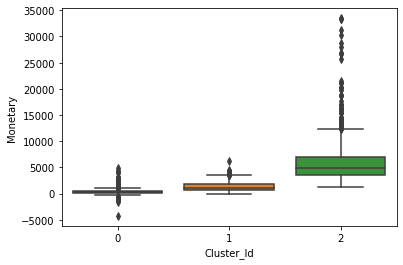

In [65]:
# Box plot to visualize Cluster Id vs Monetary
sns.boxplot(x="Cluster_Id",y="Monetary",data=rfm_model)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

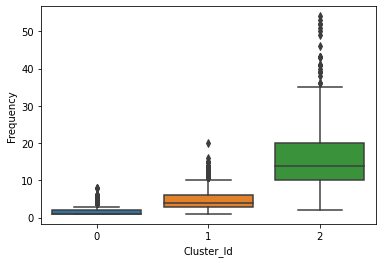

In [66]:
# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x="Cluster_Id",y="Frequency",data=rfm_model)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

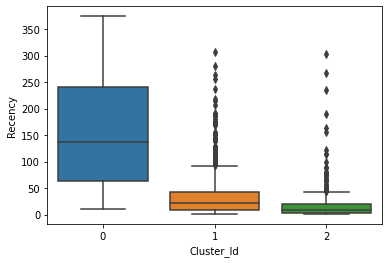

In [67]:
# Box plot to visualize Cluster Id vs Recency
sns.boxplot(x="Cluster_Id",y="Recency",data=rfm_model)

Inference:
As we can observe from above boxplots that our model has nicely created 3 segements of customer with the interpretation as below:-

. Customers with Cluster Id 0 are less frequent buyers with low monetary expenditure and also they have not purchased     anything in recent time and hence least important for business.

. Customers with Cluster Id 1 are the customers having Recency, Frequency and Monetary score in the medium range.

. Customers with Cluster Id 2 are the most frequent buyers, spending high amount and recently placing orders so they are  the most important customers from business point of view.

In [68]:
#Writing dataframe to excel file for creating visualization in tableau
from pandas import ExcelWriter
writer = pd.ExcelWriter("Online Retail.xlsx",engine="xlsxwriter")

df.to_excel(writer,sheet_name="master_data",index=False)
rfm_model.to_excel(writer,sheet_name="rfm_model",index=False)
df_inertia.to_excel(writer,sheet_name="inertia",index=False)
writer.save()

In [70]:
product_desc = pd.read_excel("Online Retail1.xlsx")
product_desc=product_desc[["StockCode","Description"]]
product_desc=product_desc.drop_duplicates()
product_desc.to_csv("product_desc.csv",index=False)

###           THANK YOU...!!!